In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("export_montecarlo.csv", engine='python', sep=";")

## Maximum infected by run

In [3]:
df_Infected = df.groupby(["Región", "Corrida"]).max().Infectados.reset_index()

In [4]:
df["Fecha"] = pd.to_datetime(df["Fecha"])

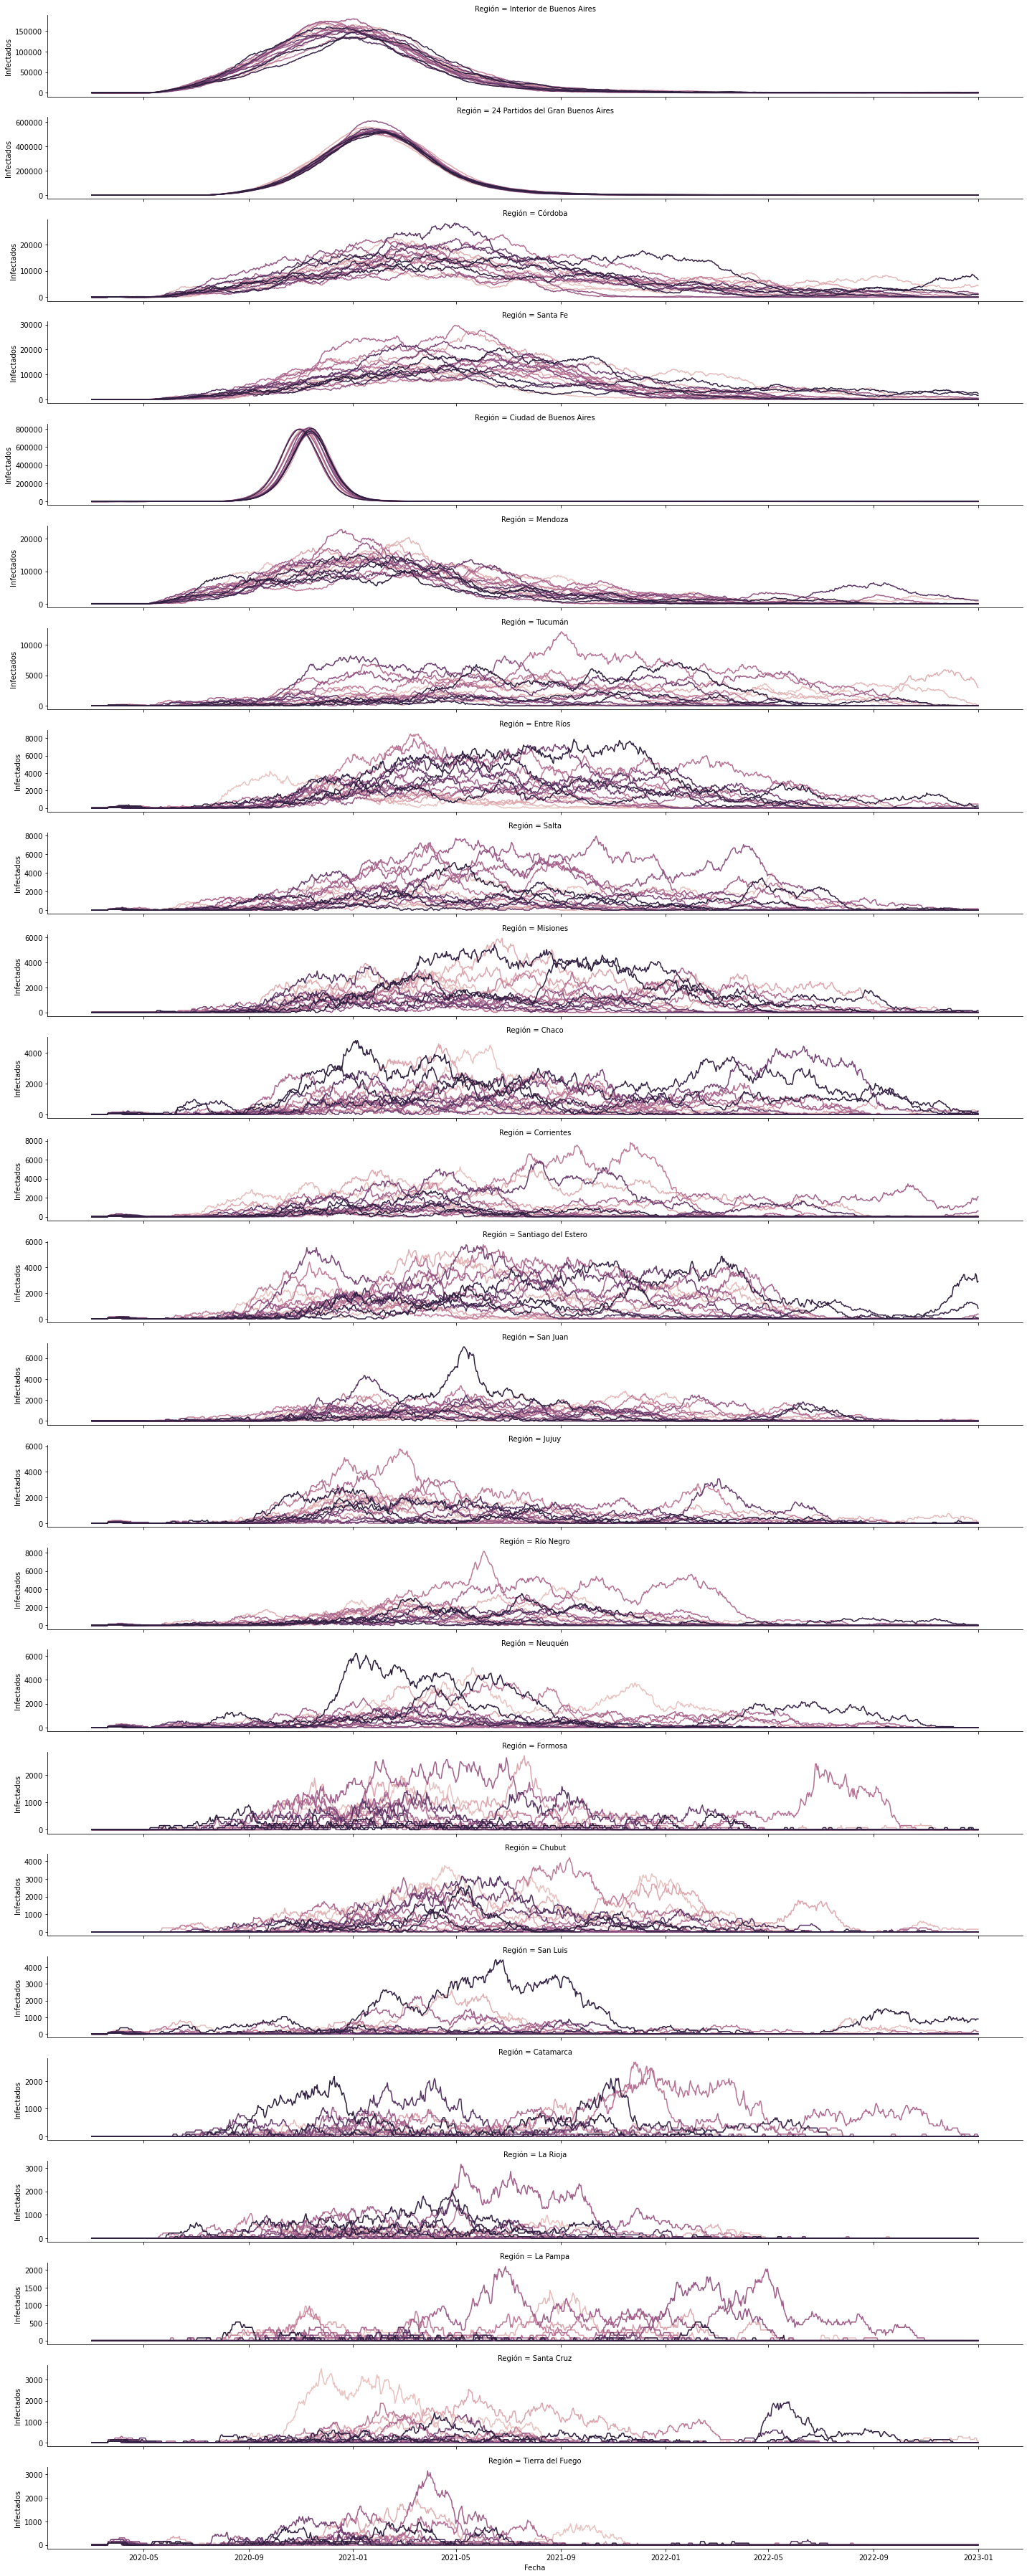

In [5]:
g = sns.FacetGrid(df[df.Corrida.isin([i for i in range(50)])], row="Región", hue="Región", aspect=10, height=2, sharey=False)
g.map(sns.lineplot, "Fecha", "Infectados", "Corrida")

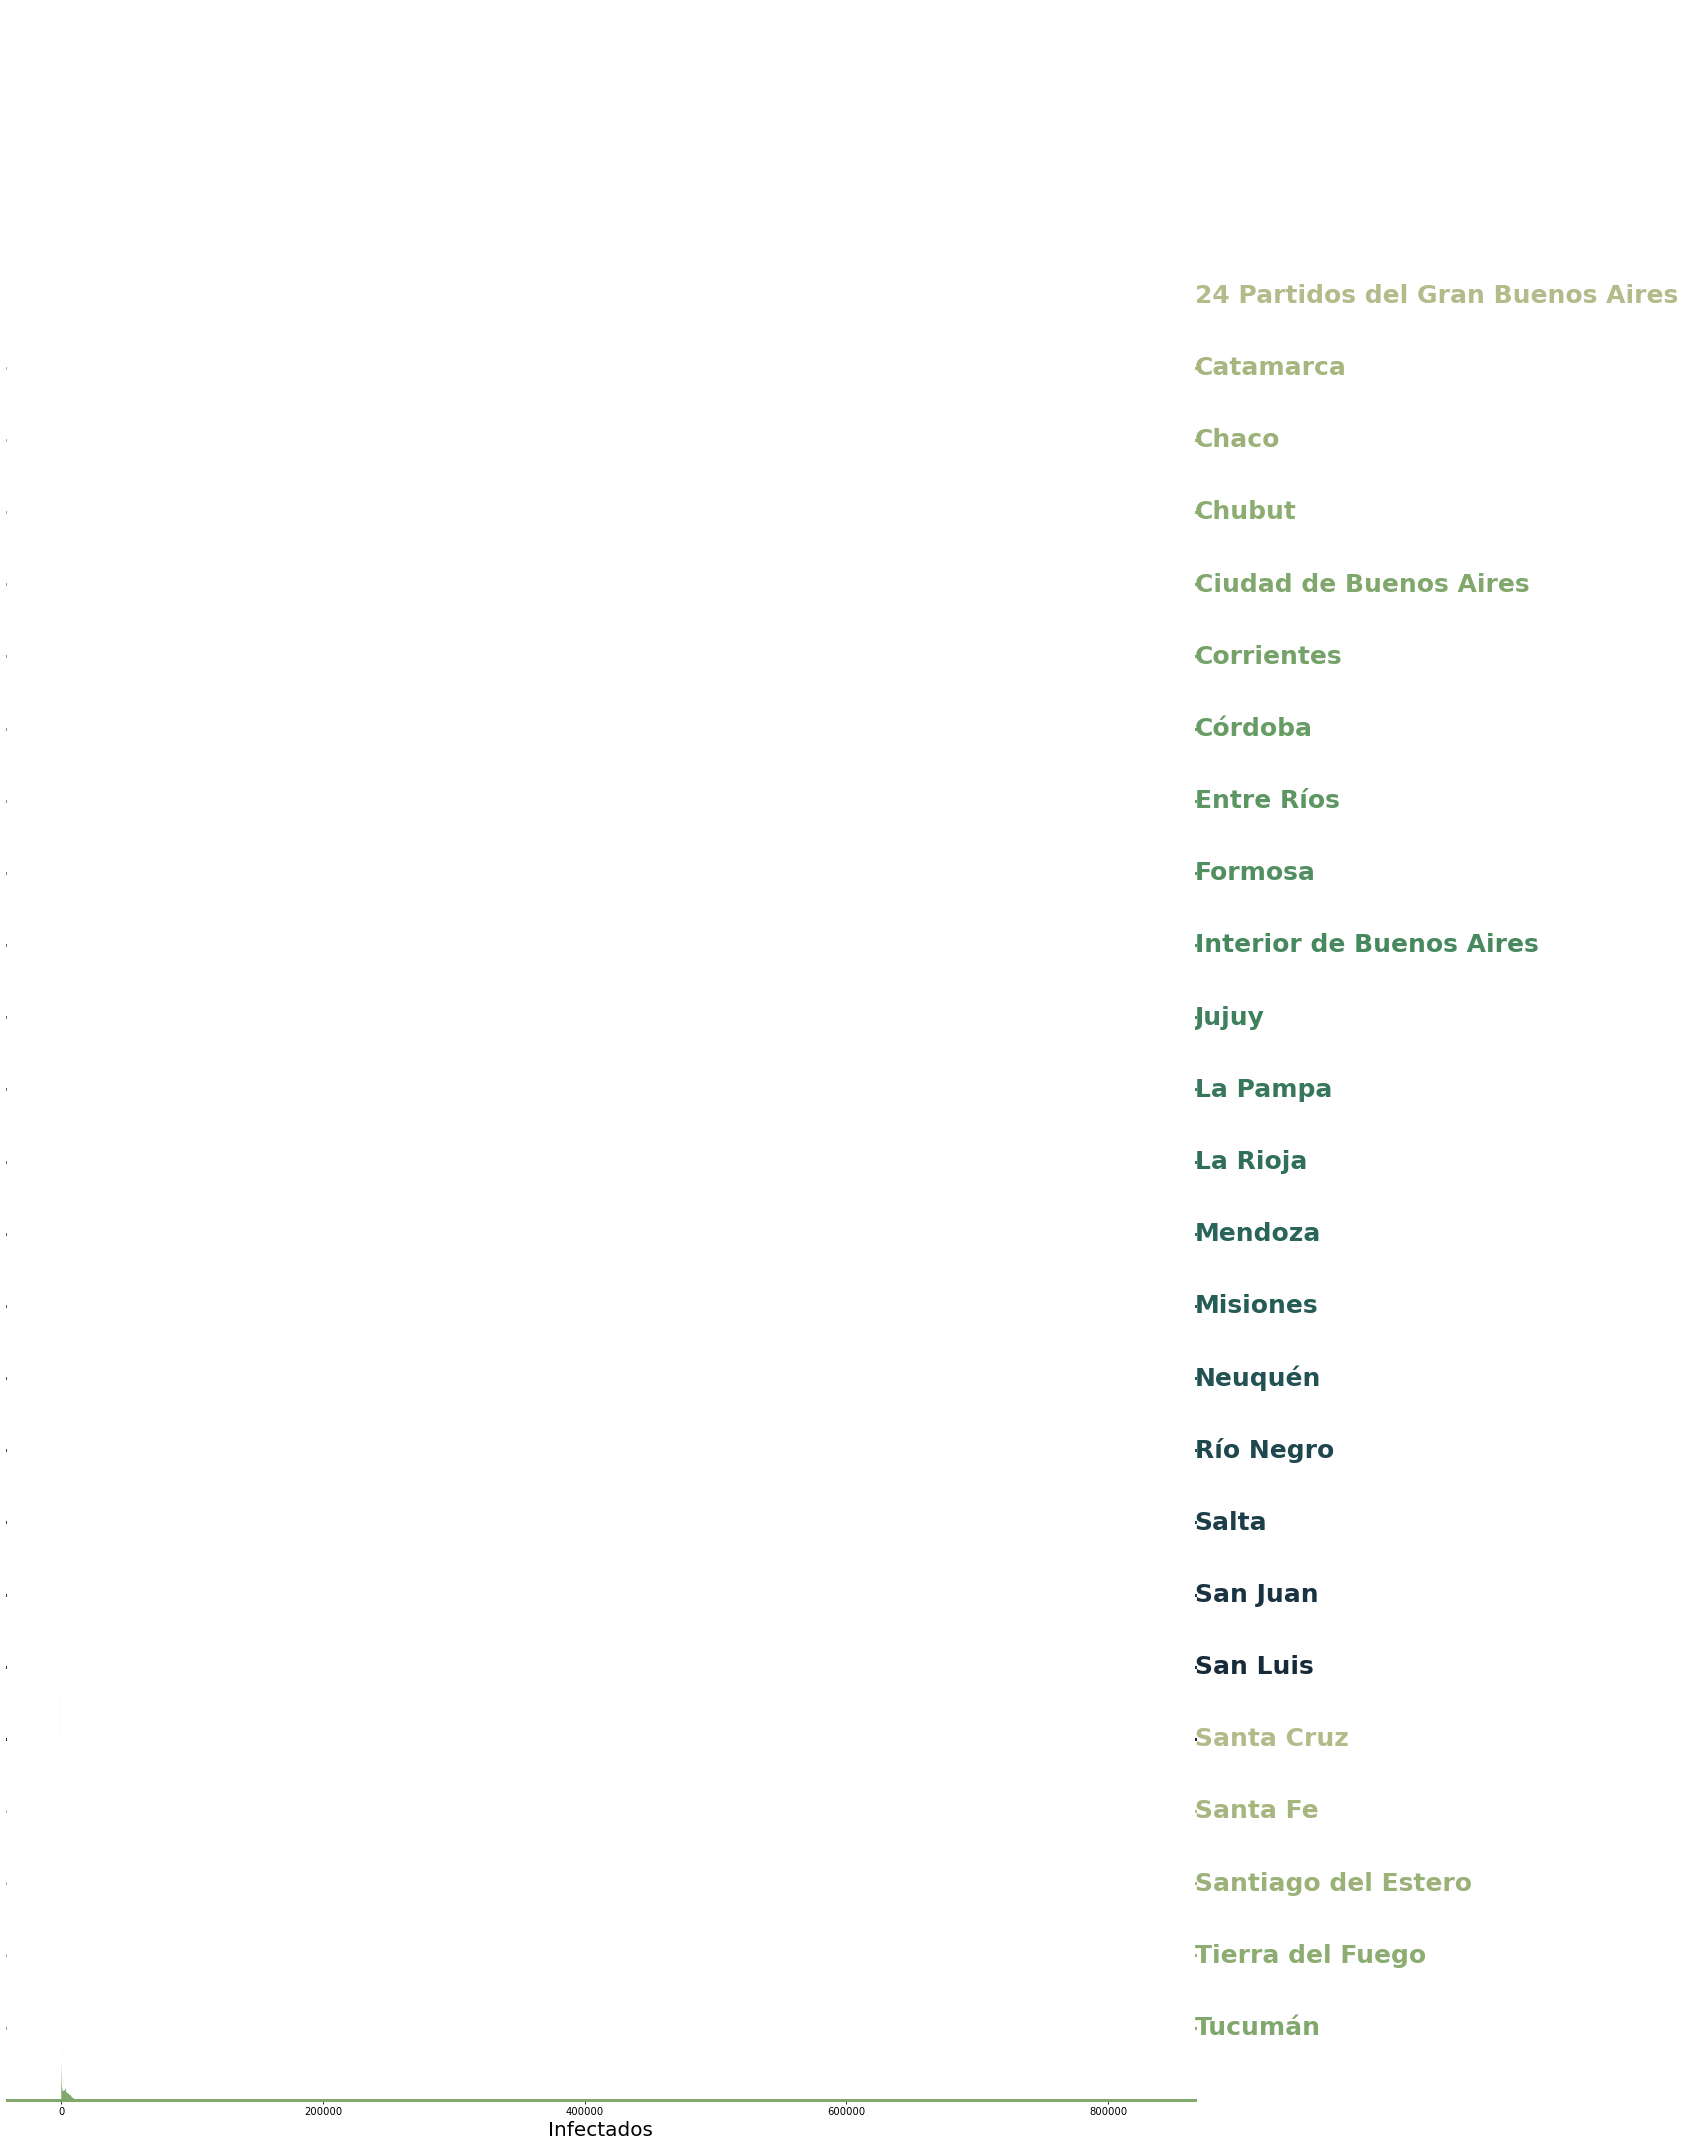

In [6]:

pal = sns.cubehelix_palette(20, rot=-.70, light=.7)
g = sns.FacetGrid(df_Infected, row="Región", hue="Región", aspect=20, height=1.2, palette=pal)

g.map(sns.kdeplot, "Infectados", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "Infectados", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=3, clip_on=False)

def label(Infectados, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=25)

g.map(label, "Infectados")

g.fig.subplots_adjust(hspace=-.8)

g.set_titles("")
g.set(yticks=[])
g.set_xlabels(fontsize=20)
g.despine(bottom=True, left=True)
plt.rc('xtick', labelsize=20)

## We need to clusterize by population to get a better understaning of the graph

In [7]:
df_for_clauster = df[["Población", "Región"]].groupby("Región").mean().reset_index().sort_values("Población")

In [8]:
df_for_clauster

,Región,Población
23,Tierra del Fuego,127200
20,Santa Cruz,273975
11,La Pampa,318975
12,La Rioja,333675
1,Catamarca,367800
19,San Luis,432300
3,Chubut,509100
8,Formosa,530175
15,Neuquén,551250
16,Río Negro,638625


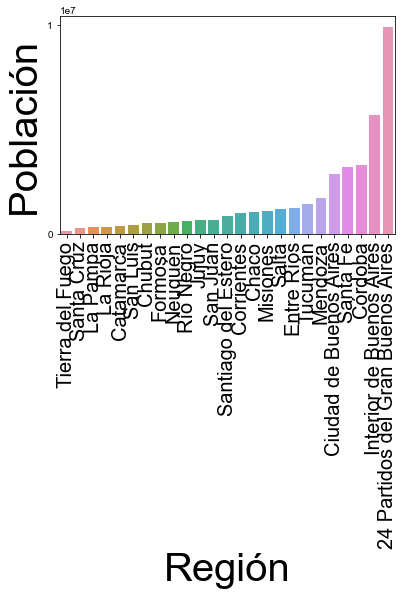

In [9]:
chart = sns.barplot(x="Región", y="Población", data=df_for_clauster, capsize=30 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Región",fontsize=40)
chart.set_ylabel("Población",fontsize=40)
sns.set(rc={'figure.figsize':(30.0, 10.0),
           'xtick.labelsize':30,
           'ytick.labelsize':40,
           'font.size':20})

In [10]:
orden = list(df_Infected.groupby("Región").mean().sort_values("Infectados", ascending=False).index)

In [11]:
df_Infected

,Región,Corrida,Infectados
0,24 Partidos del Gran Buenos Aires,1,75
1,24 Partidos del Gran Buenos Aires,2,75
2,24 Partidos del Gran Buenos Aires,3,75
3,24 Partidos del Gran Buenos Aires,4,541050
4,24 Partidos del Gran Buenos Aires,5,75
...,...,...,...
7495,Tucumán,296,75
7496,Tucumán,297,1275
7497,Tucumán,298,5325
7498,Tucumán,299,4050


In [12]:
df_Infected_G1 = df_Infected[df_Infected.Región.isin(orden[:5])]
df_Infected_G2 = df_Infected[~df_Infected.Región.isin(orden[:5])]

In [13]:
df_Infected_G2 = df_Infected_G2.drop(columns=['Corrida'])
means = df_Infected_G2.groupby("Región").mean().reset_index().rename(columns={'Infectados':'mean'})
mer = pd.merge(df_Infected_G2, means, on='Región')
df_Infected_G2 = mer.sort_values("mean").drop(columns=['mean'])

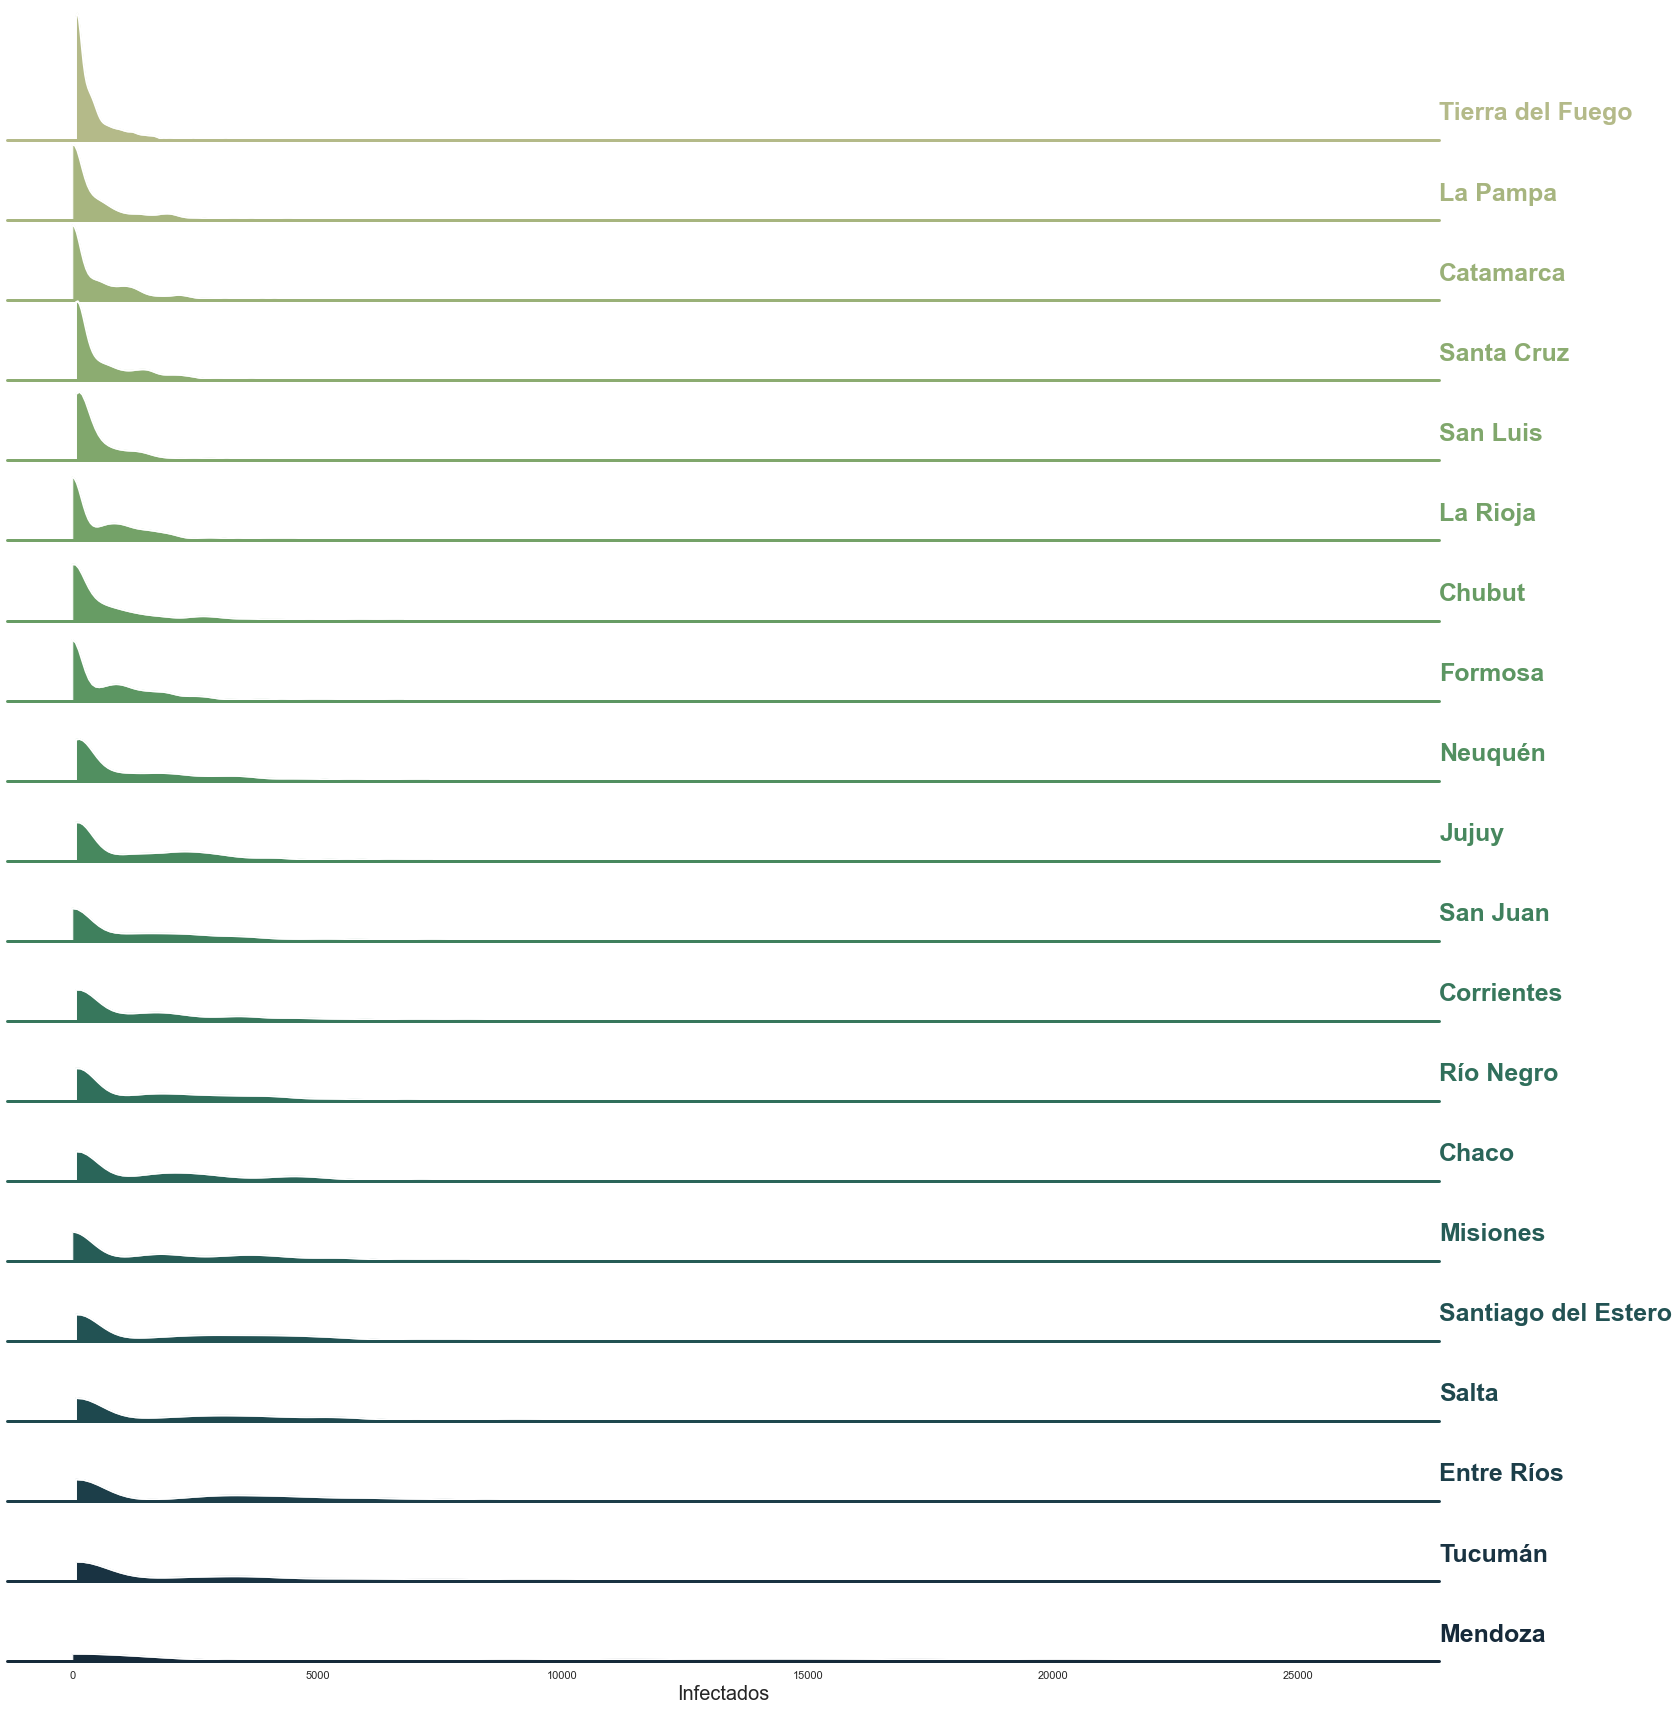

In [14]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(20, rot=-.70, light=.7)
g = sns.FacetGrid(df_Infected_G2, row="Región", hue="Región", aspect=20, height=1.2, palette=pal)

g.map(sns.kdeplot, "Infectados", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "Infectados", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=3, clip_on=False)

def label(Infectados, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=25)

g.map(label, "Infectados")

g.fig.subplots_adjust(hspace=-.4)

g.set_titles("")
g.set(yticks=[])
g.set_xlabels(fontsize=20)
g.despine(bottom=True, left=True)
plt.rc('xtick', labelsize=20)

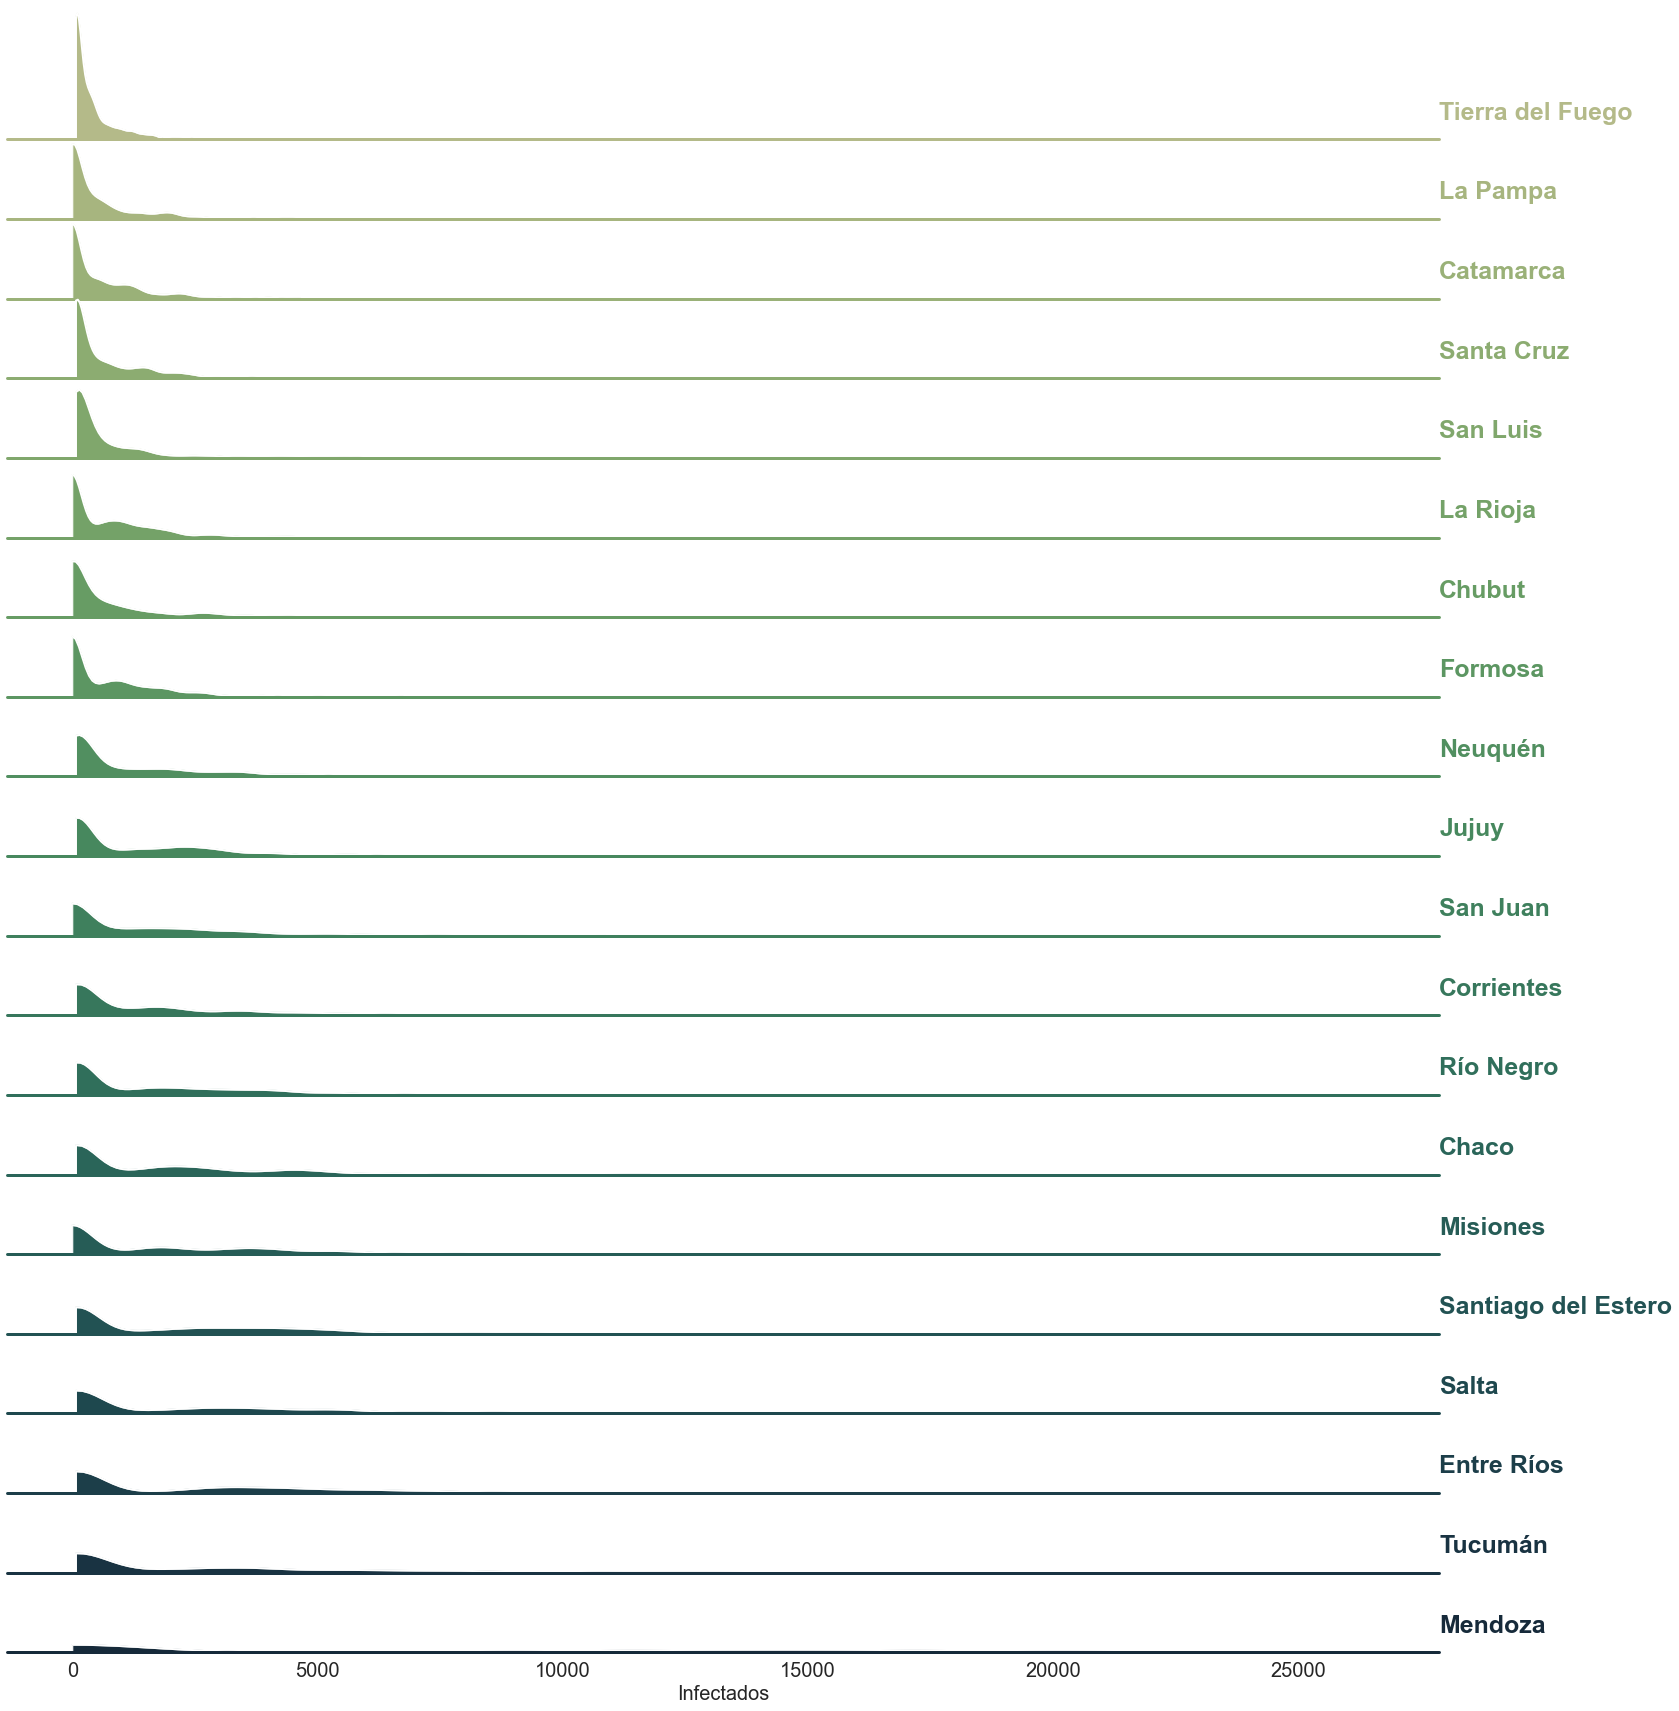

In [15]:
pal = sns.cubehelix_palette(20, rot=-.70, light=.7)
g = sns.FacetGrid(df_Infected_G2, row="Región", hue="Región", aspect=20, height=1.2, palette=pal)

g.map(sns.kdeplot, "Infectados", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "Infectados", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=3, clip_on=False)

def label(Infectados, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=25)

g.map(label, "Infectados")

g.fig.subplots_adjust(hspace=-.4)

g.set_titles("")
g.set(yticks=[])
g.set_xlabels(fontsize=20)
g.despine(bottom=True, left=True)
plt.rc('xtick', labelsize=20)

In [16]:
df_Infected_G1 = df_Infected_G1.drop(columns=['Corrida'])
means = df_Infected_G1.groupby("Región").mean().reset_index().rename(columns={'Infectados':'mean'})
mer = pd.merge(df_Infected_G1, means, on='Región')
df_Infected_G1 = mer.sort_values("mean").drop(columns=['mean'])

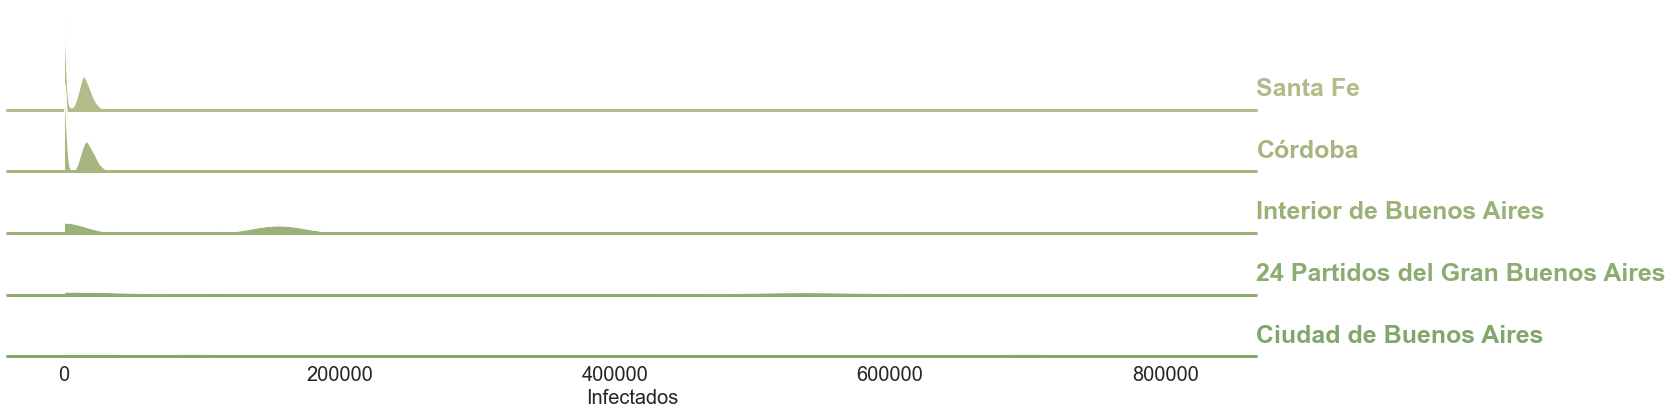

In [17]:
pal = sns.cubehelix_palette(20, rot=-.70, light=.7)
g = sns.FacetGrid(df_Infected_G1, row="Región", hue="Región", aspect=20, height=1.2, palette=pal)

g.map(sns.kdeplot, "Infectados", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "Infectados", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=3, clip_on=False)

def label(Infectados, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=25)

g.map(label, "Infectados")

g.fig.subplots_adjust(hspace=-.4)

g.set_titles("")
g.set(yticks=[])

g.set_xlabels(fontsize=20)
g.despine(bottom=True, left=True)

# Some plotting of the peak day after first infected by region

In [18]:
df.Fecha = pd.to_datetime(df.Fecha)

In [19]:
df_fechas = df[["Región", "Fecha", "Infectados", "Corrida"]]

In [20]:
df_aux = df_fechas[df_fechas["Infectados"] > 0]
df_fechas_inicio_por_region = df_aux.groupby(["Corrida", "Región"]).min().reset_index()

In [21]:
df_fechas_inicio_por_region = df_fechas_inicio_por_region.drop(columns=["Infectados"])

In [22]:
df_aux = df_fechas[df_fechas.Infectados > 0]
df_fechas_max = df_aux.groupby(["Corrida","Región"]).max().reset_index()

In [23]:
df_fechas_max["Concat"] = df_fechas_max["Corrida"].astype(str) + "&" + df_fechas_max["Infectados"].astype(str) + "&" + df_fechas_max["Región"].astype(str)
df_fechas["Concat"] = df_fechas["Corrida"].astype(str) + "&" + df_fechas["Infectados"].astype(str) + "&" + df_fechas["Región"].astype(str)

c:\users\patricio.ivan.pipp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_fechas_max = df_fechas[df_fechas["Concat"].isin(df_fechas_max["Concat"])].drop(columns='Concat').groupby(
    ["Región", "Corrida"]).min().reset_index()

In [25]:
df_fec = df_fechas_max.merge(df_fechas_inicio_por_region, on=["Región", "Corrida"]).rename(columns={"Fecha_x":"Fecha_max", "Fecha_y":"Fecha_inicio"})

In [26]:
df_fec["Dias_Hasta_El_Pico"] = (df_fec.Fecha_max - df_fec.Fecha_inicio).dt.days

In [27]:
df_fec_2 = df_fec.drop(columns=['Corrida'])

In [28]:
df_fec_2.Región.unique()

array(['24 Partidos del Gran Buenos Aires', 'Catamarca', 'Chaco',
       'Chubut', 'Ciudad de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Interior de Buenos Aires', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

In [29]:
means_fec = df_fec_2.groupby("Región").mean().reset_index().rename(columns={'Dias_Hasta_El_Pico':'mean'})

In [30]:
means_fec.Región.unique()

array(['24 Partidos del Gran Buenos Aires', 'Catamarca', 'Chaco',
       'Chubut', 'Ciudad de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Interior de Buenos Aires', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

In [31]:
mer = pd.merge(df_fec_2, means_fec, on='Región')

In [32]:
mer.Región.unique()

array(['24 Partidos del Gran Buenos Aires', 'Catamarca', 'Chaco',
       'Chubut', 'Ciudad de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Interior de Buenos Aires', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

In [33]:
df_fec = mer.sort_values("mean").drop(columns=['mean'])

In [34]:
df_fec.Región.unique()

array(['Ciudad de Buenos Aires', 'Tierra del Fuego',
       '24 Partidos del Gran Buenos Aires', 'Córdoba', 'Santa Cruz',
       'Entre Ríos', 'Río Negro', 'Neuquén', 'Salta', 'San Luis',
       'Corrientes', 'Jujuy', 'Tucumán', 'Santiago del Estero', 'Chaco',
       'Interior de Buenos Aires', 'La Rioja', 'Catamarca', 'Chubut',
       'La Pampa', 'Formosa', 'Mendoza', 'Misiones', 'San Juan',
       'Santa Fe'], dtype=object)

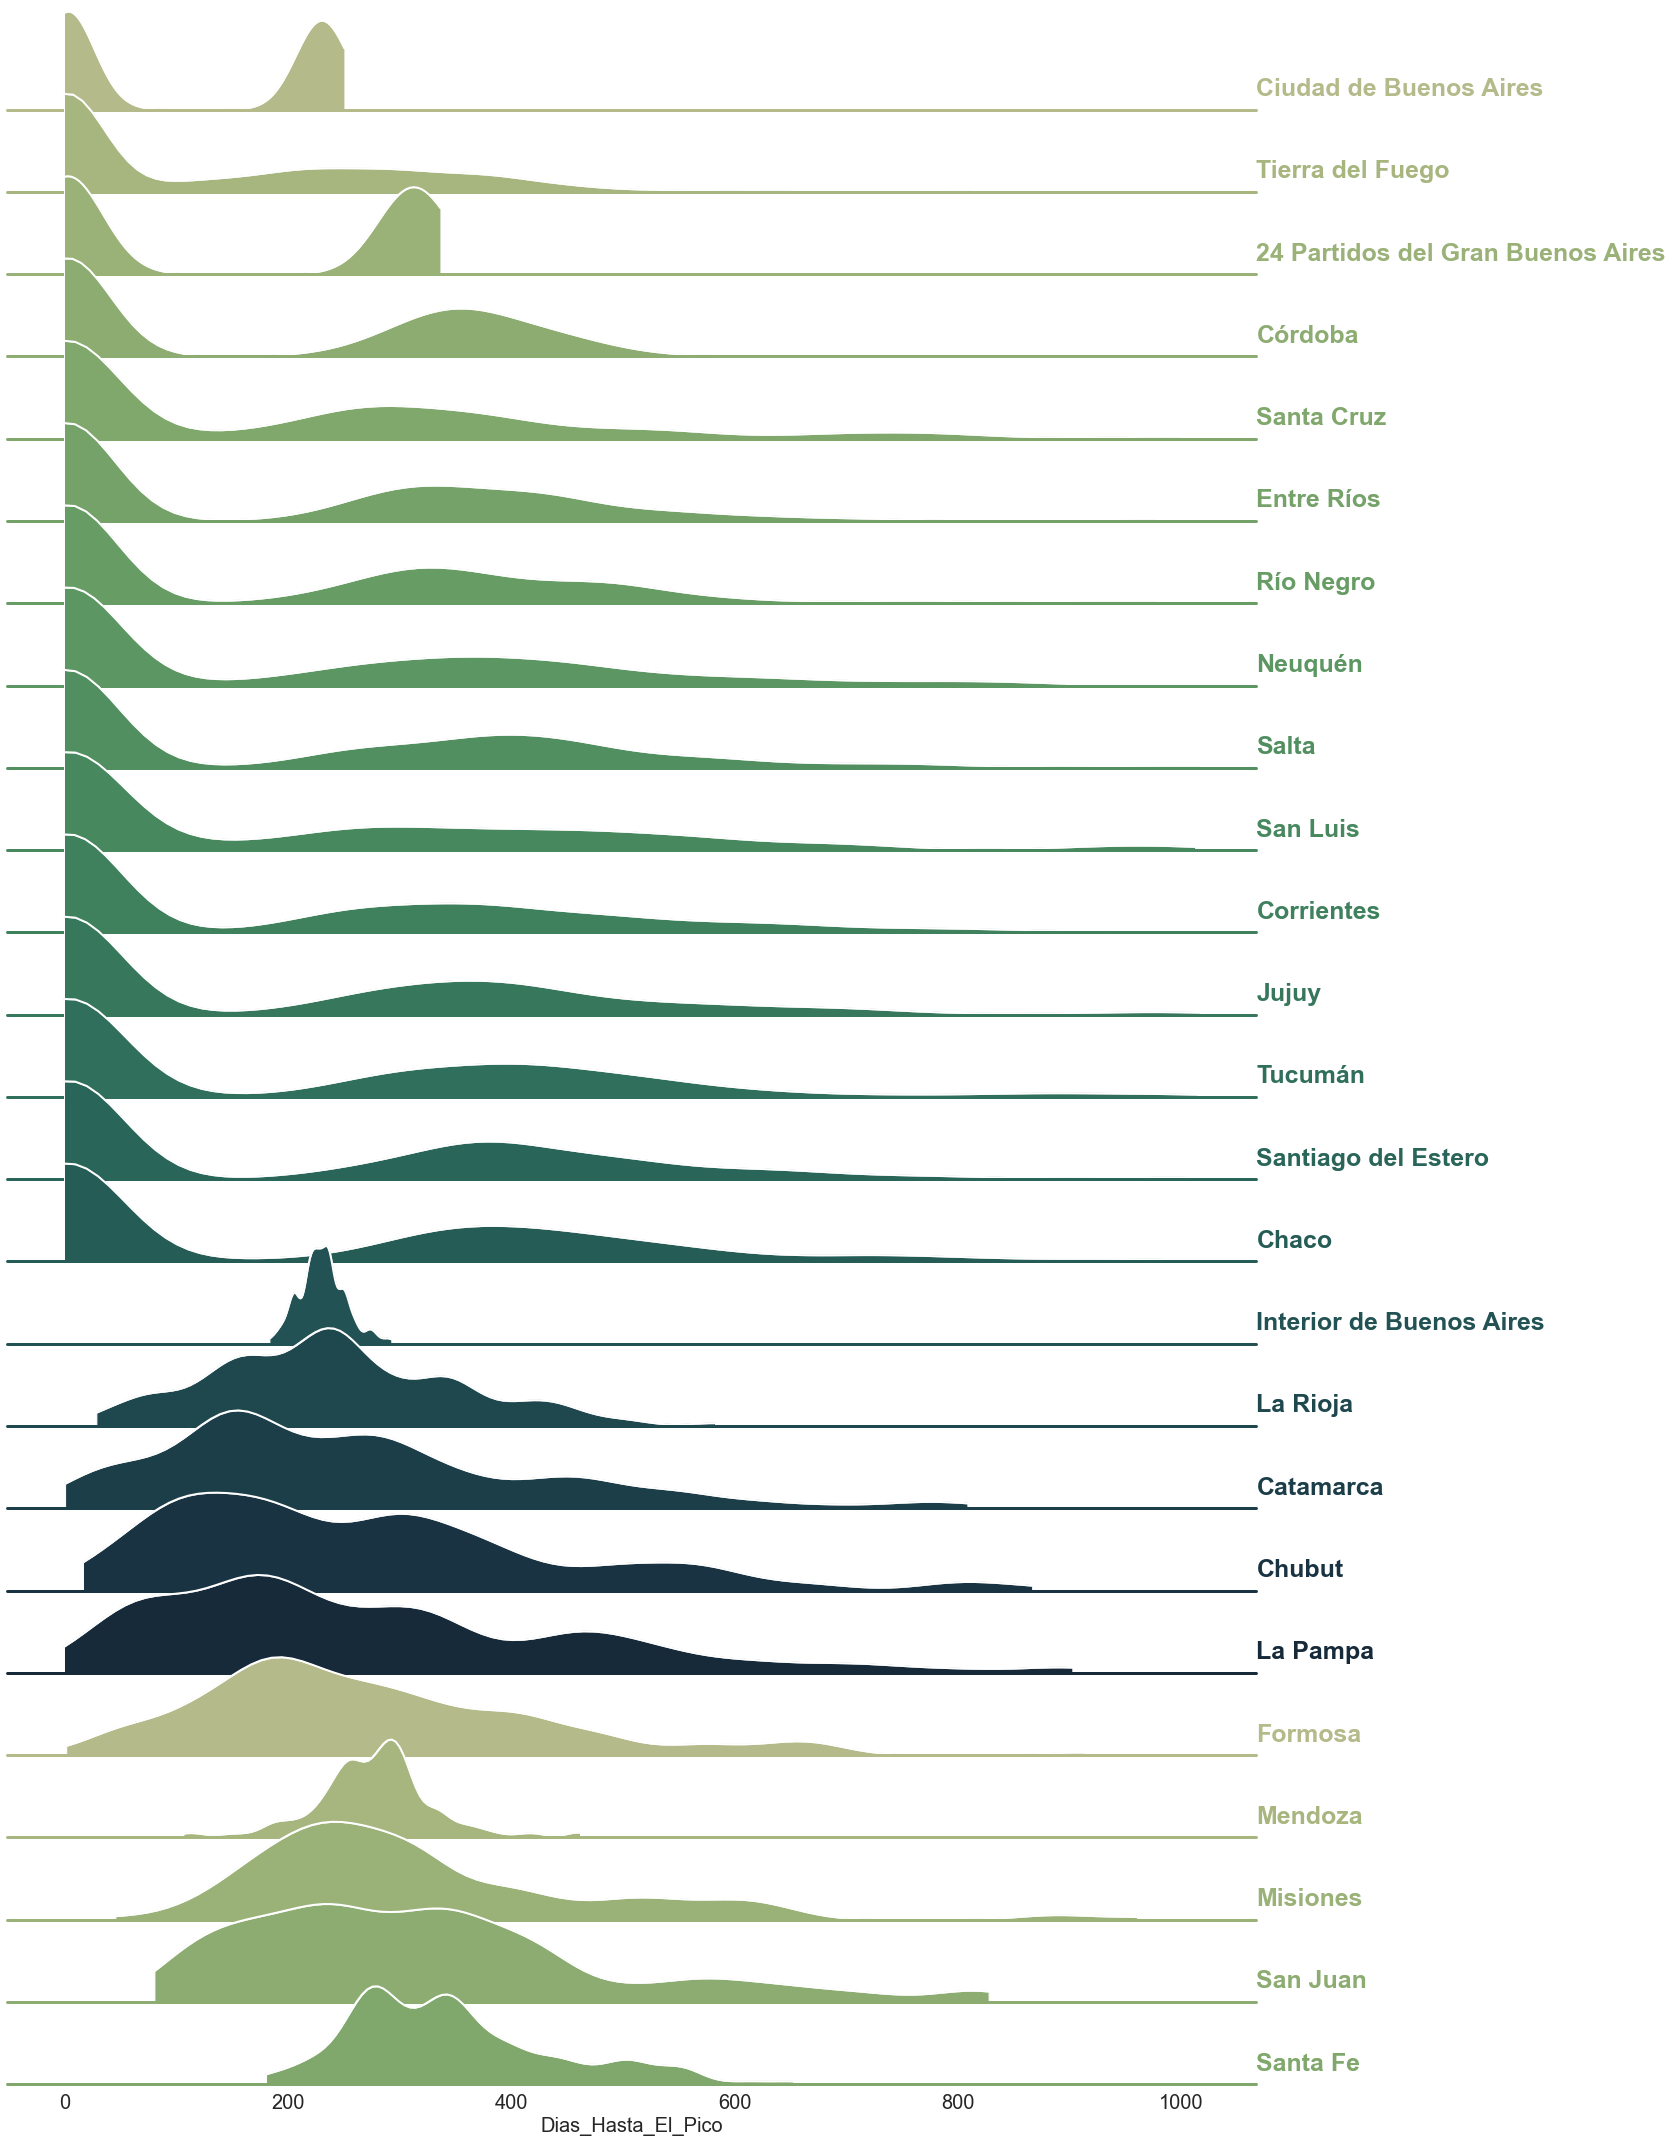

In [35]:
pal = sns.cubehelix_palette(20, rot=-.70, light=.7)
g = sns.FacetGrid(df_fec, row="Región", hue="Región", aspect=20, height=1.2, palette=pal, sharey=False)


import matplotlib.ticker as tkr

g.map(sns.kdeplot, "Dias_Hasta_El_Pico", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "Dias_Hasta_El_Pico", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=3, clip_on=False)

def label(Infectados, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=25)


g.map(label, "Dias_Hasta_El_Pico")

g.fig.subplots_adjust(hspace=-.2)

g.set_titles("")
g.set(yticks=[])
g.set_xlabels(fontsize=20)
g.despine(bottom=True, left=True)
plt.rc('xtick', labelsize=30)

In [36]:
means = df_Infected.groupby("Región").mean().reset_index().drop(columns=["Corrida"]).rename(columns={'Infectados':'mean'})
mer = pd.merge(df_Infected, means, on='Región')
df_Infected_v = mer.sort_values("mean").drop(columns=['mean','Corrida'])

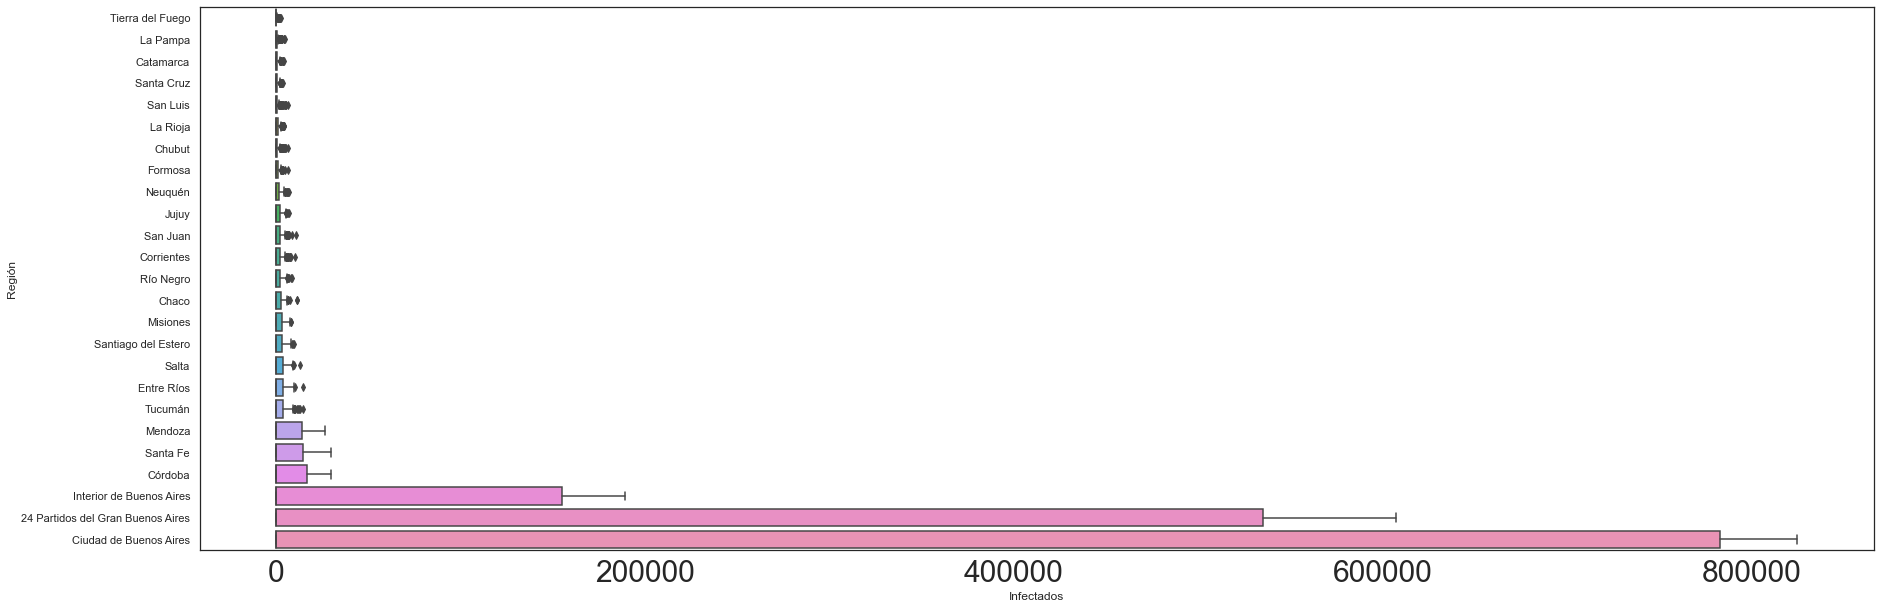

In [37]:
sns.boxplot(x="Infectados", y="Región", data=df_Infected_v)

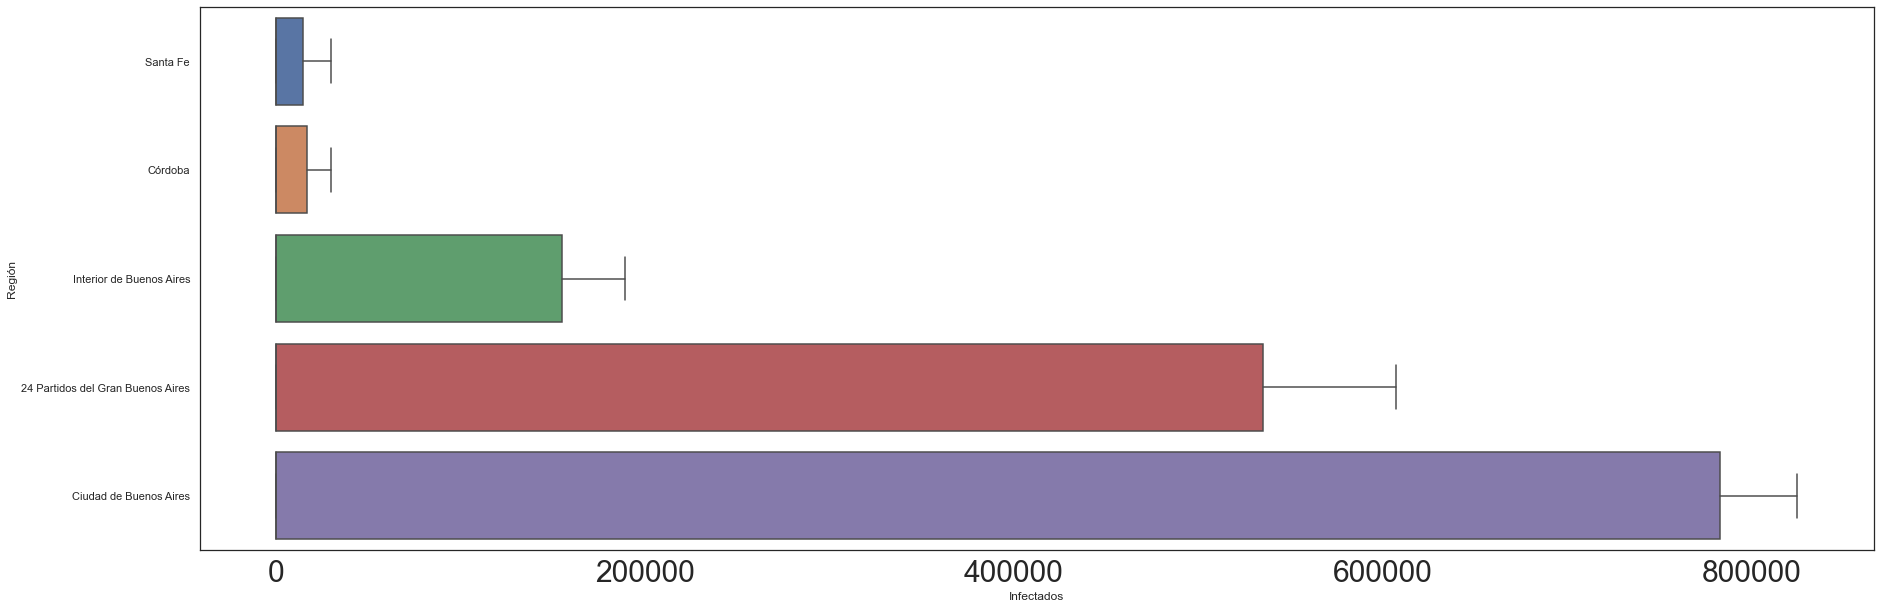

In [38]:
sns.boxplot(x="Infectados", y="Región", data=df_Infected_G1)

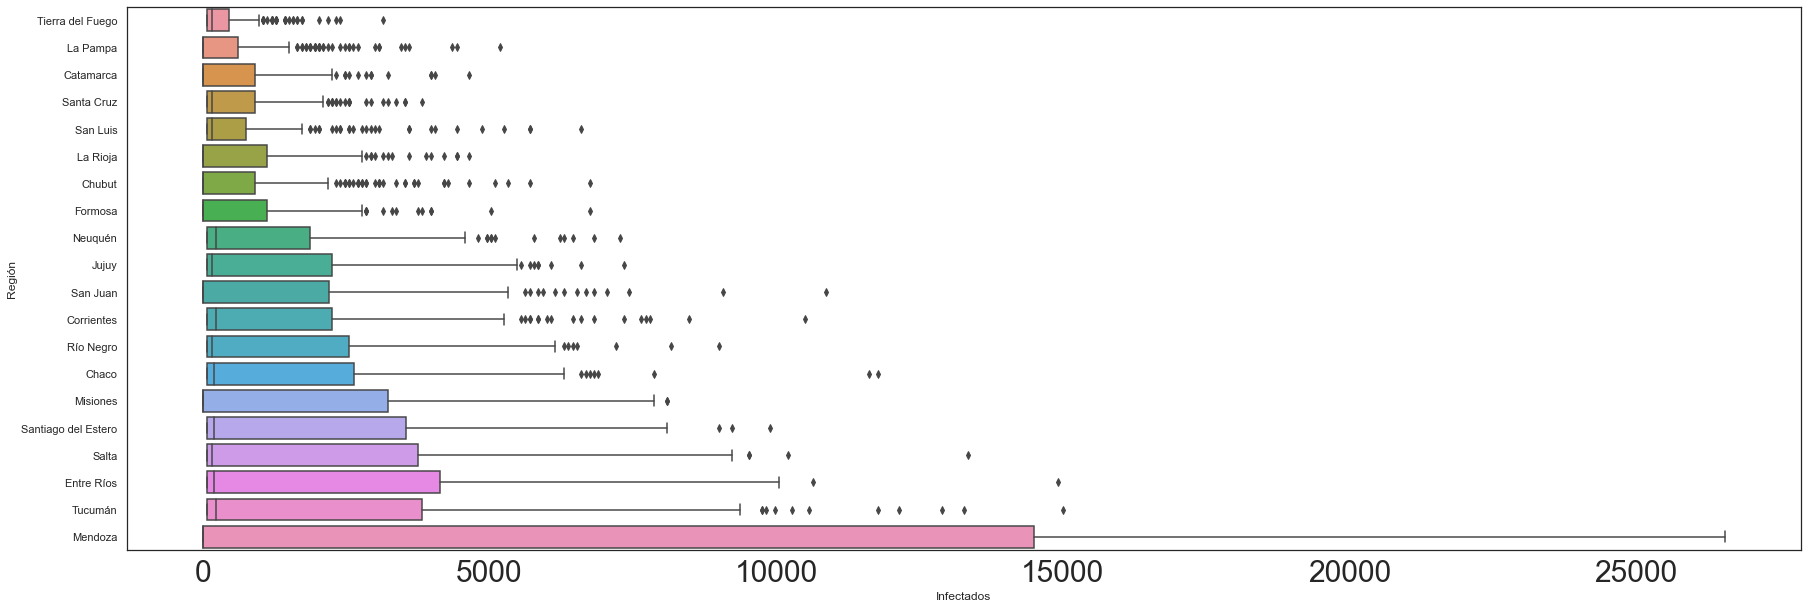

In [39]:
sns.boxplot(x="Infectados", y="Región", data=df_Infected_G2)

In [40]:
means = df_fec.groupby("Región").median().reset_index().rename(columns={'Dias_Hasta_El_Pico':'mean'})
mer = pd.merge(df_fec, means, on='Región')
df_fec_v = mer.sort_values("mean").drop(columns=['mean'])

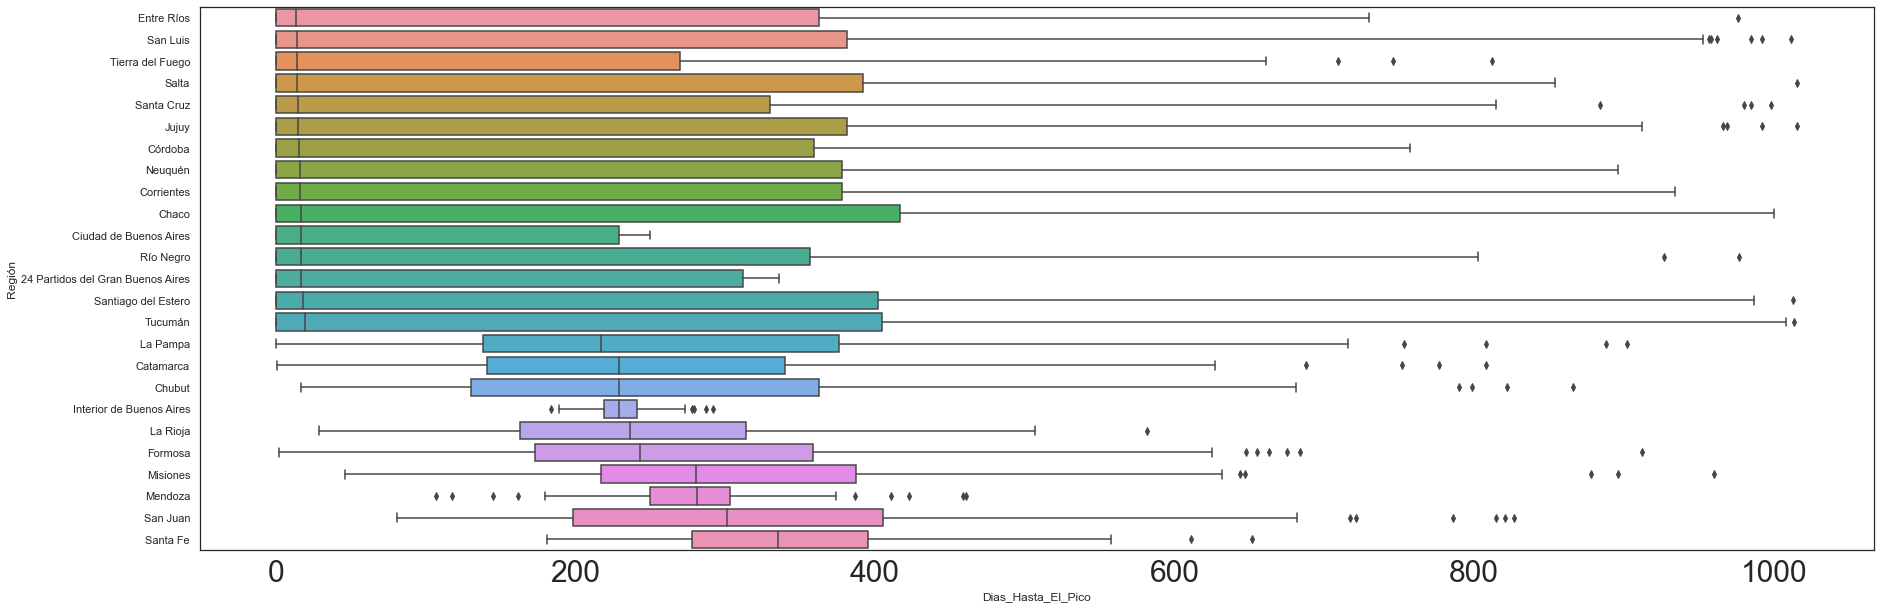

In [41]:
sns.boxplot(x="Dias_Hasta_El_Pico", y="Región", data=df_fec_v)